**This same analysis was done for Toxicity Test Data on my local**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import csv
import os
from sklearn.linear_model import ElasticNet, LinearRegression, SGDRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import nltk
import operator
import xlrd
import matplotlib.pyplot as plt
import random

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Toxicity Train Data Statistics

In [9]:
import random

comments = []
toxicity = []
tokenized = []
count_0, count_1, count_rem = 0, 0, 0

toxicity_training_file = '/content/drive/My Drive/Incivility/Perspective/Perspective_Error_Analysis/train_data/toxicity.csv'
dataset = []
with open(toxicity_training_file) as f:
	reader = csv.reader(f)
	for i, row in enumerate(reader):
		dataset.append(row[:2])

M = 284812
# CHANGE Double check all of these indices ! 
indices = np.load('/content/drive/My Drive/Incivility/Perspective/Perspective_Error_Analysis/train_data/train_shuffled_indices.npy').tolist()
indices = [idx for i, idx in enumerate(indices) if i <= M or idx <= 19023]

print(len(indices))
# for idx in indices:
for idx in range(1804874):
    # if idx > 19023:
    #     break
    row = dataset[idx]
    tokenized.extend(nltk.word_tokenize(row[0]))
    comments.append(row[0])
    toxicity.append(float(row[1]))
    if float(row[1]) == 0:
        count_0 += 1
    elif float(row[1]) == 1:
        count_1 += 1
    else:
        count_rem +=1

300806


In [10]:
print('mean toxicity: ', np.mean(toxicity))
print('std deviation toxicity: ', np.std(toxicity)) 
print(count_0, count_1, count_rem, count_0+count_1+count_rem)

mean toxicity:  0.1030172930626982
std deviation toxicity:  0.1970756901948929
1264764 4406 535704 1804874


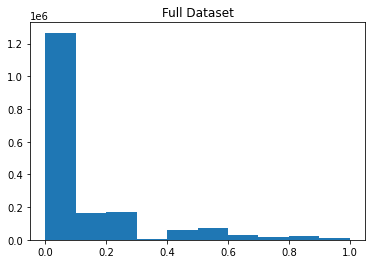

In [11]:
plt.hist(toxicity)
plt.title('Full Dataset')
plt.savefig('train_subset.png')
# plt.title('Training Set (Full)')
# plt.savefig('train_full.png')

In [ ]:
print('total comments: ', len(comments))
print('number of tokens: ' , len(tokenized))

vocab = nltk.FreqDist(tokenized)
print('number of types/vocab size: ', len(vocab.keys()))

total comments:  300806
number of tokens:  18076259
number of types/vocab size:  239055


### Regression on Errors 
Currently on Test (Subset) Errors,   
Need to do on Train (Subset) Errors

In [4]:
import csv
dir = '/content/drive/My Drive/Backup/Research/Incivility/Perspective/'
# Read input data
input_file_1 = dir+'Toxicity_Error_Analysis_Train_Set_1_100k.tsv'
input_file_2 = dir+'Toxicity_Error_Analysis_Train_Set_2_100k.tsv'
input_file_3 = dir+'Toxicity_Error_Analysis_Train_Set_3_100k.tsv'

comments = []
scores = []
with open(input_file_1) as f:
    header = f.readline()
    reader = csv.reader(f, delimiter="\t")
    for row in reader:
        # dataset.append(row)
        new_row = list(filter(('').__ne__, row))[:5]
        if len(new_row) != 5:
            print(new_row[0])
        
        # print(new_row)
        comments.append(new_row[1])
        scores.append(float(new_row[4]))
        
        # if float(new_row[4]) < 0:
        #     comments.append(new_row[1])
        #     scores.append(float(new_row[4]))

with open(input_file_2) as f:
    header = f.readline()
    reader = csv.reader(f, delimiter="\t")
    for row in reader:
        # dataset.append(row)
        new_row = list(filter(('').__ne__, row))[:5]
        if len(new_row) != 5:
            print(new_row)
        
        comments.append(new_row[1])
        scores.append(float(new_row[4]))

        # if float(new_row[4]) < 0:
        #     comments.append(new_row[1])
        #     scores.append(float(new_row[4]))

with open(input_file_3) as f:
    header = f.readline()
    reader = csv.reader(f, delimiter="\t")
    for row in reader:
        # dataset.append(row)
        new_row = list(filter(('').__ne__, row))[:5]
        if len(new_row) != 5:
            print(new_row)
        
        comments.append(new_row[1])
        scores.append(float(new_row[4]))

        # if float(new_row[4]) < 0:
        #     comments.append(new_row[1])
        #     scores.append(float(new_row[4]))

print(len(comments))

299764


In [ ]:
# # Overpredictions
# count = 0
# cleaned_comments = []
# cleaned_scores = []
# for idx, comment in enumerate(comments):

#     if idx % 100000 == 0:
#         print(idx)

#     if comment.count('\t') > 3:    
#     #   print('\n Trying to fix **', comment, scores[idx])          
#       new_lines = comment.split('\n')
#       text, score = new_lines[0].split('\t')[0], new_lines[0].split('\t')[3]
#     #   print('& ', text, score)
      
#       if float(score) < 0: 
#         cleaned_comments.append(text)
#         cleaned_scores.append(float(score))
#         count += 1
      
#       for line in new_lines[1:-1]:
#         fields = line.split('\t')
#         # print('& ', fields)
#         if float(fields[4]) < 0:
#           cleaned_comments.append(fields[1])
#           cleaned_scores.append(float(fields[4]))
#           count += 1
      
#       text = new_lines[-1].split('\t')[1]

#       if float(scores[idx]) < 0:
#         cleaned_comments.append(text)
#         cleaned_scores.append(scores[idx])
#     #   print('& ', text, scores[idx])
#         count += 1

#     else:
      
#       if float(scores[idx]) < 0:
#         cleaned_comments.append(comment)
#         cleaned_scores.append(scores[idx])
#         count += 1

# print(count, len(cleaned_comments), len(cleaned_scores))
# comments = cleaned_comments
# scores = cleaned_scores

0
100000
200000
266404 266404 266404


In [5]:
# Overpredictions and underpredictions
count = 0
cleaned_comments = []
cleaned_scores = []
for idx, comment in enumerate(comments):

    if idx % 100000 == 0:
        print(idx)

    if comment.count('\t') > 3:    
    #   print('\n Trying to fix **', comment, scores[idx])          
      new_lines = comment.split('\n')
      text, score = new_lines[0].split('\t')[0], new_lines[0].split('\t')[3]
    #   print('& ', text, score)
      cleaned_comments.append(text)
      cleaned_scores.append(float(score))
      
      for line in new_lines[1:-1]:
        fields = line.split('\t')
        # print('& ', fields)
        cleaned_comments.append(fields[1])
        cleaned_scores.append(float(fields[4]))
      
      text = new_lines[-1].split('\t')[1]
      cleaned_comments.append(text)
      cleaned_scores.append(scores[idx])
    #   print('& ', text, scores[idx])
      count += len(new_lines)

    else:
      count += 1
      cleaned_comments.append(comment)
      cleaned_scores.append(scores[idx])

print(count, len(cleaned_comments), len(cleaned_scores))
comments = cleaned_comments
scores = cleaned_scores

0
100000
200000
300806 300806 300806


In [17]:
import numpy as np

np.sum(np.array(scores) > 0, axis=0)

34402

In [ ]:
print(np.mean(scores), np.std(scores))

-0.11483467183996837 0.1341977448126924


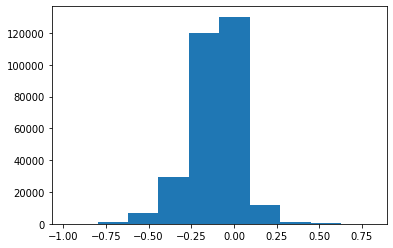

In [ ]:
import matplotlib.pyplot as plt
plt.hist(scores)

plt.show()

In [6]:
# Keep a separate validation set 20% of total 
data_comments, dev_comments, data_scores, dev_scores = train_test_split(comments, scores, test_size=0.2, random_state=2020)

In [7]:
print(len(comments), len(data_comments), len(dev_comments))

300806 240644 60162


In [ ]:
# Grid Search with 5-fold CV and fit
pipeline = Pipeline([
        #    ('vect', TfidfVectorizer()),          
           ('vect', CountVectorizer(binary=True)), # Try binary/one-hot?
           ('clf', SGDRegressor(random_state=526, penalty='elasticnet')),
# ])

parameters = {
    # Any more features?
    'vect__max_features': (2000, 4000, 5000),
    'clf__max_iter': (300, 500, 1000),  
    'clf__l1_ratio': (0, 0.25, 0.5, 0.75, 1),
    # 'clf__alpha': (0.0001, 0.00001, 0.000001)
}

grid_search = GridSearchCV(pipeline, parameters, scoring='neg_mean_squared_error', cv=5, verbose=3)

In [ ]:
grid_search.fit(data_comments, data_scores)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] clf__l1_ratio=0, clf__max_iter=300, vect__max_features=2000 .....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__l1_ratio=0, clf__max_iter=300, vect__max_features=2000, score=-0.011, total=   8.7s
[CV] clf__l1_ratio=0, clf__max_iter=300, vect__max_features=2000 .....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s


[CV]  clf__l1_ratio=0, clf__max_iter=300, vect__max_features=2000, score=-0.011, total=   8.6s
[CV] clf__l1_ratio=0, clf__max_iter=300, vect__max_features=2000 .....


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.3s remaining:    0.0s


[CV]  clf__l1_ratio=0, clf__max_iter=300, vect__max_features=2000, score=-0.011, total=   8.5s
[CV] clf__l1_ratio=0, clf__max_iter=300, vect__max_features=2000 .....
[CV]  clf__l1_ratio=0, clf__max_iter=300, vect__max_features=2000, score=-0.011, total=   8.5s
[CV] clf__l1_ratio=0, clf__max_iter=300, vect__max_features=2000 .....
[CV]  clf__l1_ratio=0, clf__max_iter=300, vect__max_features=2000, score=-0.011, total=   8.5s
[CV] clf__l1_ratio=0, clf__max_iter=300, vect__max_features=4000 .....
[CV]  clf__l1_ratio=0, clf__max_iter=300, vect__max_features=4000, score=-0.011, total=   8.7s
[CV] clf__l1_ratio=0, clf__max_iter=300, vect__max_features=4000 .....
[CV]  clf__l1_ratio=0, clf__max_iter=300, vect__max_features=4000, score=-0.011, total=   8.8s
[CV] clf__l1_ratio=0, clf__max_iter=300, vect__max_features=4000 .....
[CV]  clf__l1_ratio=0, clf__max_iter=300, vect__max_features=4000, score=-0.011, total=   8.7s
[CV] clf__l1_ratio=0, clf__max_iter=300, vect__max_features=4000 .....
[CV]

[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed: 32.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=True,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prepr

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'clf__l1_ratio': 0, 'clf__max_iter': 300, 'vect__max_features': 5000}
-0.010990150482989075


In [ ]:
# Fill hyperparameters from above and create a pipeline
best_pipeline = Pipeline([
           #('vect', TfidfVectorizer(max_features=2000)),
           ('vect', CountVectorizer(binary=True, max_features=5000)),
           ('clf', SGDRegressor(alpha=0.0001, l1_ratio=0, penalty='elasticnet', max_iter=300, random_state=325)),
])

In [ ]:
# # Specific Model chosen for Binary BOW
# best_pipeline = Pipeline([
#            #('vect', TfidfVectorizer(max_features=2000)),
#            ('vect', CountVectorizer(binary=True, max_features=4000)),
#            ('clf', SGDRegressor(alpha=0.00001, l1_ratio=1, penalty='elasticnet', max_iter=1000, random_state=325)),
# ])

In [ ]:
def plot_learning_curves(model, X, y):
    train_errors = []
    for m in range(1, len(X), 5000):
        model.fit(X[:m], y[:m])
        y_predict = model.predict(X[:m])
        train_errors.append(mean_squared_error(y[:m], y_predict))
    plt.plot(train_errors[2:], "r-+", linewidth=2, label="train")

In [ ]:
plot_learning_curves(best_pipeline, data_comments, data_scores)

In [ ]:
# Training model on full train set with pipeline of best hyperparameters
best_pipeline.fit(data_comments, data_scores)

# Testing the tuned trained model on the test set
y_train = data_scores
X_test = dev_comments
y_test = dev_scores
y_baseline_random = [random.uniform(-1, 1) for i in range(len(y_test))]
avg = np.average(y_train)
y_baseline_average = [avg for i in range(len(y_test))]

y_pred = best_pipeline.predict(X_test)

print('Mean squared error:')
print('Model: ', mean_squared_error(y_test, y_pred))
print('Random baseline: ', mean_squared_error(y_test, y_baseline_random))
print('Average baseline: ', mean_squared_error(y_test, y_baseline_average))

print('R2 score:')
print('Model: ', r2_score(y_test, y_pred))
print('Random baseline: ', r2_score(y_test, y_baseline_random))
print('Average baseline: ', r2_score(y_test, y_baseline_average))

# Saving the sample predictions
with open('Sample_Preds_280k_binary.csv', 'w') as g:
    writer = csv.writer(g)
    writer.writerow(['Text', 'Target Error', 'Predicted Error'])								
    for text, true_score, pred_score in zip(X_test, y_test, y_pred):
        writer.writerow([text, true_score, pred_score]) 


Mean squared error:
Model:  0.010869819211254607
Random baseline:  0.3678691813531605
Average baseline:  0.013299558163345118
R2 score:
Model:  0.18269320492187524
Random baseline:  -26.660255959773437
Average baseline:  -4.340835912941543e-09


In [ ]:
plt.scatter(y_test, y_pred)
plt.show()
plt.close()
plt.scatter(y_test, y_baseline_random)
plt.show()
plt.close()
plt.scatter(y_test, y_baseline_average)
plt.show()
plt.close()

In [ ]:
# plt.plot(sorted(y_test))
# plt.show()
# plt.close()

In [ ]:
# plt.plot(sorted(y_pred))
# plt.show()
# plt.close()

### Vocabulary analysis - regression weights

In [ ]:
cv = best_pipeline.named_steps['vect']

cv_fit = cv.transform(np.array(data_comments))
vocab_counts = cv_fit.toarray().sum(axis=0)

weights = best_pipeline.named_steps['clf'].coef_

vocab = []
for word, idx in sorted(cv.vocabulary_.items()):
    vocab.append([word, vocab_counts[idx], weights[idx]])

In [ ]:
with open('weights_300k_binary_over_rs_325.csv', 'w') as w:
    writer = csv.writer(w)
    for row in vocab:
        writer.writerow(row)

In [ ]:
vocab[:50]

[['00', 360, -0.0010901957795549483],
 ['000', 3102, 0.006529012408982931],
 ['01', 251, 0.004183042344281289],
 ['02', 206, -0.001744194980548785],
 ['03', 254, -0.000597010728705671],
 ['04', 209, 0.0003040504583565331],
 ['05', 227, 0.004934685515878764],
 ['06', 244, 0.00125074777900774],
 ['07', 234, 0.00225956888673933],
 ['08', 287, 0.0020431914259744885],
 ['09', 240, 0.0041737999538770075],
 ['10', 3475, 0.006834337656218739],
 ['100', 2309, 0.0014079314766224844],
 ['1000', 375, 0.0018034703509004991],
 ['101', 177, -0.003132377492374606],
 ['11', 1180, -0.003695402566427629],
 ['12', 1327, 0.00329918909467723],
 ['13', 630, 0.0014929509007854248],
 ['14', 634, 0.009496313653952683],
 ['15', 1560, 0.004353668139801223],
 ['150', 392, -0.0012750150573363533],
 ['16', 736, 0.002413785110837004],
 ['17', 609, 0.006216979031361398],
 ['18', 791, 0.0014345020743370407],
 ['19', 474, 0.002883619502641369],
 ['1980', 177, 0.0029430912535720203],
 ['1st', 420, 3.364738444330822e-05],